Time elapsed:  0.14554738998413086
Time elapsed in ms:  145.54738998413086


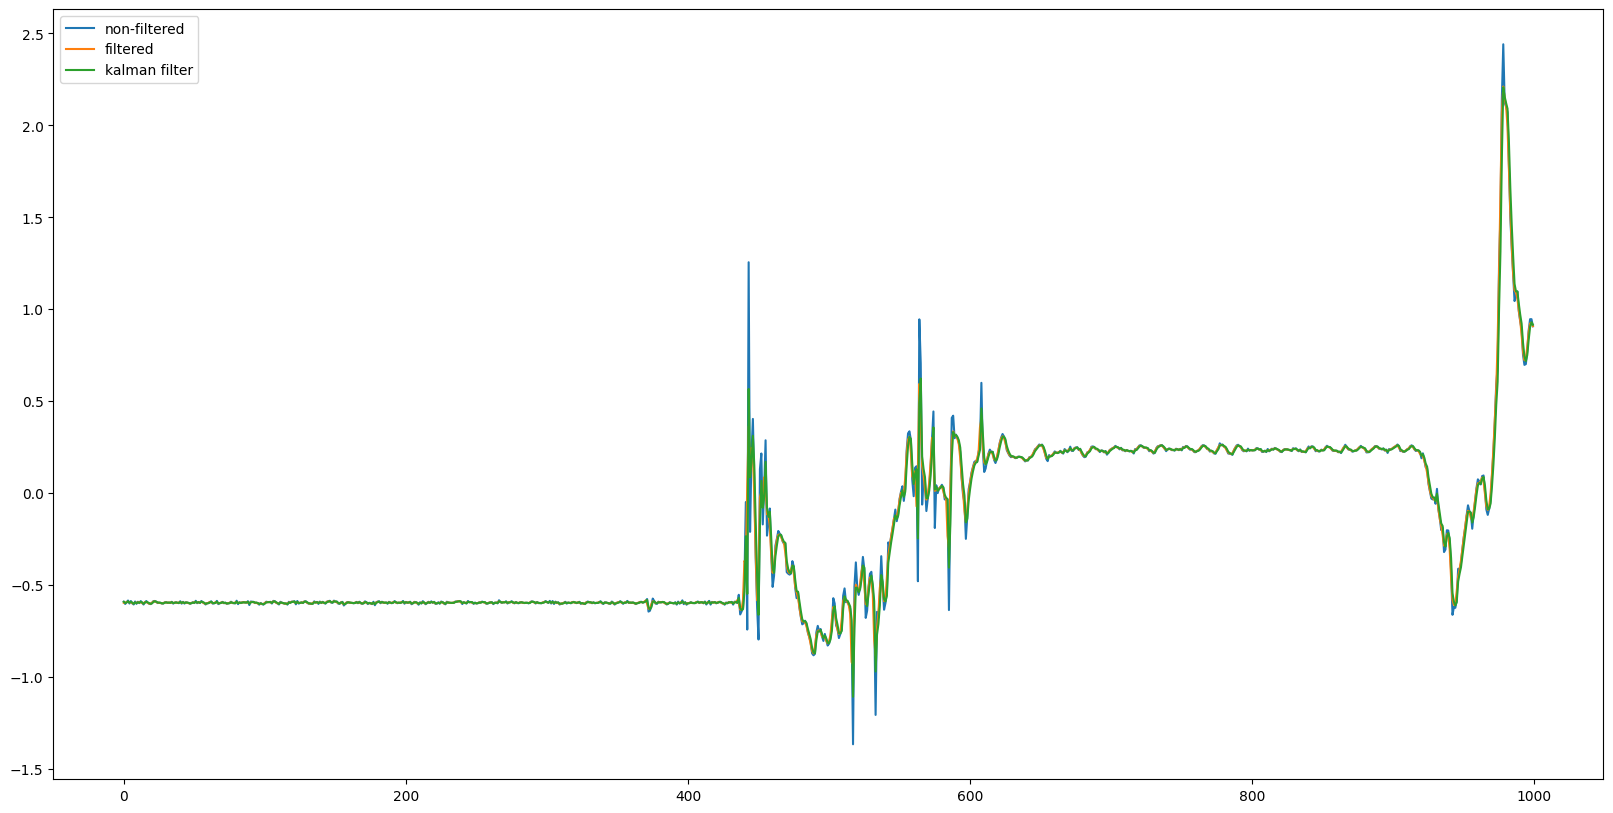

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# prepare data

path = '../data/Raw/example.csv'

raw = pd.read_csv(path, header=None)

noisy = raw.iloc[:, [16]].copy()
fil = raw.iloc[:, [19]].copy()

def plot(noisy, filtered, kf):
    plt.figure(figsize=(20, 10))
    plt.plot(noisy, label='non-filtered')
    plt.plot(filtered, label='filtered')
    plt.plot(kf, label='kalman filter')
    plt.legend()
    plt.show()

def kalman_filter(noisy, process_var, measurement_var, initial_value, initial_estimate_error):
    n = 1000

    filtered_estimate = np.zeros(n)
    estimate_error = np.zeros(n)

    filtered_estimate[0] = initial_value
    estimate_error[0] = initial_estimate_error

    for t in range(1, n):
        # prediction
        prediction = filtered_estimate[t - 1]
        prediction_error = estimate_error[t - 1] + process_var

        # update
        kalman_gain = prediction_error / (prediction_error + measurement_var)
        filtered_estimate[t] = prediction + kalman_gain * (noisy.iloc[t] - prediction)
        estimate_error[t] = (1 - kalman_gain) * prediction_error

    return filtered_estimate

# play around with the parameters: process_var, measurement_var

start = time.time()
kf_df = kalman_filter(noisy, process_var=5, measurement_var=5, initial_value=noisy.iloc[0], initial_estimate_error=1)
end = time.time()

print('Time elapsed: ', end - start)
print("Time elapsed in ms: ", (end - start) * 1000)

plot(noisy, fil, kf_df)
